In [156]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [69]:
df = pd.read_csv('/Users/jacobwhite/Downloads/storms.csv.gz', compression='gzip', encoding = 'latin', low_memory=False)

In [70]:
df.head()

,STATE__,BGN_DATE,BGN_TIME,TIME_ZONE,COUNTY,COUNTYNAME,STATE,EVTYPE,BGN_RANGE,BGN_AZI,BGN_LOCATI,END_DATE,END_TIME,COUNTY_END,COUNTYENDN,END_RANGE,END_AZI,END_LOCATI,LENGTH,WIDTH,F,MAG,FATALITIES,INJURIES,PROPDMG,PROPDMGEXP,CROPDMG,CROPDMGEXP,WFO,STATEOFFIC,ZONENAMES,LATITUDE,LONGITUDE,LATITUDE_E,LONGITUDE_,REMARKS,REFNUM
0,1.0,4/18/1950 0:00:00,130,CST,97.0,MOBILE,AL,TORNADO,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,14.0,100.0,3.0,0.0,0.0,15.0,25.0,K,0.0,NaN,NaN,NaN,NaN,3040.0,8812.0,3051.0,8806.0,NaN,1.0
1,1.0,4/18/1950 0:00:00,145,CST,3.0,BALDWIN,AL,TORNADO,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,2.0,150.0,2.0,0.0,0.0,0.0,2.5,K,0.0,NaN,NaN,NaN,NaN,3042.0,8755.0,0.0,0.0,NaN,2.0
2,1.0,2/20/1951 0:00:00,1600,CST,57.0,FAYETTE,AL,TORNADO,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.1,123.0,2.0,0.0,0.0,2.0,25.0,K,0.0,NaN,NaN,NaN,NaN,3340.0,8742.0,0.0,0.0,NaN,3.0
3,1.0,6/8/1951 0:00:00,900,CST,89.0,MADISON,AL,TORNADO,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,100.0,2.0,0.0,0.0,2.0,2.5,K,0.0,NaN,NaN,NaN,NaN,3458.0,8626.0,0.0,0.0,NaN,4.0
4,1.0,11/15/1951 0:00:00,1500,CST,43.0,CULLMAN,AL,TORNADO,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,150.0,2.0,0.0,0.0,2.0,2.5,K,0.0,NaN,NaN,NaN,NaN,3412.0,8642.0,0.0,0.0,NaN,5.0


In [71]:
df.shape

(902297, 37)

In [72]:
df.columns

Index(['STATE__', 'BGN_DATE', 'BGN_TIME', 'TIME_ZONE', 'COUNTY', 'COUNTYNAME',
       'STATE', 'EVTYPE', 'BGN_RANGE', 'BGN_AZI', 'BGN_LOCATI', 'END_DATE',
       'END_TIME', 'COUNTY_END', 'COUNTYENDN', 'END_RANGE', 'END_AZI',
       'END_LOCATI', 'LENGTH', 'WIDTH', 'F', 'MAG', 'FATALITIES', 'INJURIES',
       'PROPDMG', 'PROPDMGEXP', 'CROPDMG', 'CROPDMGEXP', 'WFO', 'STATEOFFIC',
       'ZONENAMES', 'LATITUDE', 'LONGITUDE', 'LATITUDE_E', 'LONGITUDE_',
       'REMARKS', 'REFNUM'],
      dtype='object')

In [73]:
df.dtypes

STATE__       float64
BGN_DATE       object
BGN_TIME       object
TIME_ZONE      object
COUNTY        float64
COUNTYNAME     object
STATE          object
EVTYPE         object
BGN_RANGE     float64
BGN_AZI        object
BGN_LOCATI     object
END_DATE       object
END_TIME       object
COUNTY_END    float64
COUNTYENDN    float64
END_RANGE     float64
END_AZI        object
END_LOCATI     object
LENGTH        float64
WIDTH         float64
F             float64
MAG           float64
FATALITIES    float64
INJURIES      float64
PROPDMG       float64
PROPDMGEXP     object
CROPDMG       float64
CROPDMGEXP     object
WFO            object
STATEOFFIC     object
ZONENAMES      object
LATITUDE      float64
LONGITUDE     float64
LATITUDE_E    float64
LONGITUDE_    float64
REMARKS        object
REFNUM        float64
dtype: object

In [74]:
df.describe(include = 'all')

,STATE__,BGN_DATE,BGN_TIME,TIME_ZONE,COUNTY,COUNTYNAME,STATE,EVTYPE,BGN_RANGE,BGN_AZI,BGN_LOCATI,END_DATE,END_TIME,COUNTY_END,COUNTYENDN,END_RANGE,END_AZI,END_LOCATI,LENGTH,WIDTH,F,MAG,FATALITIES,INJURIES,PROPDMG,PROPDMGEXP,CROPDMG,CROPDMGEXP,WFO,STATEOFFIC,ZONENAMES,LATITUDE,LONGITUDE,LATITUDE_E,LONGITUDE_,REMARKS,REFNUM
count,902297.000000,902297,902297,902297,902297.000000,900708,902297,902297,902297.000000,354965,614554,658886,663319,902297.0,0.0,902297.000000,177460,403072,902297.000000,902297.000000,58734.000000,902297.000000,902297.000000,902297.000000,902297.000000,436363,902297.000000,283884,760228,653528,308268,902250.000000,902297.000000,902257.000000,902297.000000,614864,902297.000000
unique,NaN,16335,3729,22,NaN,29600,72,985,NaN,34,54428,6662,3646,NaN,NaN,NaN,23,34505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,8,541,249,25111,NaN,NaN,NaN,NaN,436905,NaN
top,NaN,5/25/2011 0:00:00,12:00:00 AM,CST,NaN,JEFFERSON,TX,HAIL,NaN,N,COUNTYWIDE,4/27/2011 0:00:00,06:00:00 PM,NaN,NaN,NaN,N,COUNTYWIDE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,K,NaN,K,OUN,"TEXAS, North",...,NaN,NaN,NaN,NaN,,NaN
freq,NaN,1202,10163,547493,NaN,7840,83728,288661,NaN,86752,19680,1214,9802,NaN,NaN,NaN,28082,19731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,424665,NaN,281832,17393,12193,205988,NaN,NaN,NaN,NaN,24013,NaN
mean,31.200958,NaN,NaN,NaN,100.642905,NaN,NaN,NaN,1.483889,NaN,NaN,NaN,NaN,0.0,NaN,0.986198,NaN,NaN,0.230130,7.503044,0.914990,46.899832,0.016785,0.155745,12.063101,NaN,1.527022,NaN,NaN,NaN,NaN,2874.942950,6939.538350,1451.611545,3509.139732,NaN,451149.000000
std,16.570178,NaN,NaN,NaN,107.276509,NaN,NaN,NaN,5.481574,NaN,NaN,NaN,NaN,0.0,NaN,3.374106,NaN,NaN,4.617236,61.571363,1.002292,61.913304,0.765283,5.431887,59.475851,NaN,22.173680,NaN,NaN,NaN,NaN,1657.648801,3958.062506,1858.727873,4475.682973,NaN,260470.852256
min,1.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,-14451.000000,0.000000,-14455.000000,NaN,1.000000
25%,19.000000,NaN,NaN,NaN,31.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,2802.000000,7247.000000,0.000000,0.000000,NaN,225575.000000
50%,30.000000,NaN,NaN,NaN,75.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,0.000000,NaN,NaN,0.000000,0.000000,1.000000,50.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,3540.000000,8707.000000,0.000000,0.000000,NaN,451149.000000
75%,45.000000,NaN,NaN,NaN,131.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.0,NaN,0.000000,NaN,NaN,0.000000,0.000000,1.000000,75.000000,0.000000,0.000000,0.500000,NaN,0.000000,NaN,NaN,NaN,NaN,4019.000000,9605.000000,3549.000000,8735.000000,NaN,676723.000000


In [75]:
print(df.sum[['COUNTY_END']])

TypeError: 'method' object is not subscriptable

In [76]:
print(df.EVTYPE.unique())

['TORNADO' 'TSTM WIND' 'HAIL' 'FREEZING RAIN' 'SNOW'
 'ICE STORM/FLASH FLOOD' 'SNOW/ICE' 'WINTER STORM'
 'HURRICANE OPAL/HIGH WINDS' 'THUNDERSTORM WINDS' 'RECORD COLD'
 'HURRICANE ERIN' 'HURRICANE OPAL' 'HEAVY RAIN' 'LIGHTNING'
 'THUNDERSTORM WIND' 'DENSE FOG' 'RIP CURRENT' 'THUNDERSTORM WINS'
 'FLASH FLOOD' 'FLASH FLOODING' 'HIGH WINDS' 'FUNNEL CLOUD' 'TORNADO F0'
 'THUNDERSTORM WINDS LIGHTNING' 'THUNDERSTORM WINDS/HAIL' 'HEAT' 'WIND'
 'LIGHTING' 'HEAVY RAINS' 'LIGHTNING AND HEAVY RAIN' 'FUNNEL' 'WALL CLOUD'
 'FLOODING' 'THUNDERSTORM WINDS HAIL' 'FLOOD' 'COLD' 'HEAVY RAIN/LIGHTNING'
 'FLASH FLOODING/THUNDERSTORM WI' 'WALL CLOUD/FUNNEL CLOUD' 'THUNDERSTORM'
 'WATERSPOUT' 'EXTREME COLD' 'HAIL 1.75)' 'LIGHTNING/HEAVY RAIN'
 'HIGH WIND' 'BLIZZARD' 'BLIZZARD WEATHER' 'WIND CHILL' 'BREAKUP FLOODING'
 'HIGH WIND/BLIZZARD' 'RIVER FLOOD' 'HEAVY SNOW' 'FREEZE' 'COASTAL FLOOD'
 'HIGH WIND AND HIGH TIDES' 'HIGH WIND/BLIZZARD/FREEZING RA' 'HIGH TIDES'
 'HIGH WIND AND HEAVY SNOW' 'RECORD COLD AND H

In [87]:
print(event_types_imp = df[['EVTYPE']])

TypeError: 'event_types_imp' is an invalid keyword argument for this function

In [78]:
print(df.STATE.unique())

['AL' 'AZ' 'AR' 'CA' 'CO' 'CT' 'DE' 'DC' 'FL' 'GA' 'HI' 'ID' 'IL' 'IN' 'IA'
 'KS' 'KY' 'LA' 'ME' 'MD' 'MA' 'MI' 'MN' 'MS' 'MO' 'MT' 'NE' 'NV' 'NH' 'NJ'
 'NM' 'NY' 'NC' 'ND' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD' 'TN' 'TX' 'UT' 'VT'
 'VA' 'WA' 'WV' 'WI' 'WY' 'PR' 'AK' 'ST' 'AS' 'GU' 'MH' 'VI' 'AM' 'LC' 'PH'
 'GM' 'PZ' 'AN' 'LH' 'LM' 'LE' 'LS' 'SL' 'LO' 'PM' 'PK' 'XX']


In [81]:
print(df['STATE'].value_counts())

TX    83728
KS    53440
OK    46802
MO    35648
IA    31069
NE    30271
IL    28488
AR    27102
NC    25351
GA    25259
OH    24922
MN    23609
AL    22739
PA    22226
MS    22192
FL    22124
KY    22092
SD    21727
TN    21721
IN    21506
VA    21189
NY    21058
CO    20473
WI    19781
MI    17910
LA    17323
SC    17126
MT    14695
ND    14632
CA    10780
      ...  
UT     4135
VT     3871
WA     3312
CT     3294
AN     3250
NV     3139
NH     3022
PR     3015
HI     2547
DE     1913
AM     1879
LE     1526
LM     1347
RI      839
LH      654
DC      437
VI      338
GU      306
LC      274
LS      262
AS      257
PZ       96
LO       70
PH       28
PK       23
SL        7
XX        2
MH        1
ST        1
PM        1
Name: STATE, Length: 72, dtype: int64


In [82]:
print(df.PROPDMGEXP.unique())

['K' 'M' nan 'B' 'm' '+' '0' '5' '6' '?' '4' '2' '3' 'h' '7' 'H' '-' '1'
 '8']


In [93]:
evtype_fat = df.groupby(['EVTYPE','FATALITIES']).sum()

In [94]:
print(evtype_fat)

                                         STATE__    COUNTY  BGN_RANGE  \
EVTYPE                      FATALITIES                                  
   HIGH SURF ADVISORY       0.0             60.0       2.0        0.0   
 COASTAL FLOOD              0.0             34.0      17.0        0.0   
 FLASH FLOOD                0.0             48.0     201.0        0.0   
 LIGHTNING                  0.0              4.0      25.0        0.0   
 TSTM WIND                  0.0             56.0     414.0        0.0   
 TSTM WIND (G45)            0.0             12.0      71.0        1.0   
 WATERSPOUT                 0.0             12.0      87.0        0.0   
 WIND                       0.0             53.0      77.0        0.0   
?                           0.0             54.0      23.0        0.0   
ABNORMAL WARMTH             0.0             85.0     233.0        0.0   
ABNORMALLY DRY              0.0             19.0      97.0        0.0   
ABNORMALLY WET              0.0             13.0   

In [100]:
print(df[['EVTYPE','FATALITIES']].groupby('EVTYPE').sum().sort_values('FATALITIES',ascending=False))

                                FATALITIES
EVTYPE                                    
TORNADO                             5633.0
EXCESSIVE HEAT                      1903.0
FLASH FLOOD                          978.0
HEAT                                 937.0
LIGHTNING                            816.0
TSTM WIND                            504.0
FLOOD                                470.0
RIP CURRENT                          368.0
HIGH WIND                            248.0
AVALANCHE                            224.0
WINTER STORM                         206.0
RIP CURRENTS                         204.0
HEAT WAVE                            172.0
EXTREME COLD                         160.0
THUNDERSTORM WIND                    133.0
HEAVY SNOW                           127.0
EXTREME COLD/WIND CHILL              125.0
STRONG WIND                          103.0
HIGH SURF                            101.0
BLIZZARD                             101.0
HEAVY RAIN                            98.0
EXTREME HEA

In [111]:
et_fat = df[['EVTYPE','FATALITIES']].groupby('EVTYPE').sum().sort_values('FATALITIES',ascending=False)

In [124]:
type(et_fat)

pandas.core.frame.DataFrame

In [117]:
(et_fat[et_fat.FATALITIES > 0]).count()

FATALITIES    168
dtype: int64

In [118]:
et_inj = df[['EVTYPE','INJURIES']].groupby('EVTYPE').sum().sort_values('INJURIES',ascending=False)

In [119]:
print(et_inj)

                                INJURIES
EVTYPE                                  
TORNADO                          91346.0
TSTM WIND                         6957.0
FLOOD                             6789.0
EXCESSIVE HEAT                    6525.0
LIGHTNING                         5230.0
HEAT                              2100.0
ICE STORM                         1975.0
FLASH FLOOD                       1777.0
THUNDERSTORM WIND                 1488.0
HAIL                              1361.0
WINTER STORM                      1321.0
HURRICANE/TYPHOON                 1275.0
HIGH WIND                         1137.0
HEAVY SNOW                        1021.0
WILDFIRE                           911.0
THUNDERSTORM WINDS                 908.0
BLIZZARD                           805.0
FOG                                734.0
WILD/FOREST FIRE                   545.0
DUST STORM                         440.0
WINTER WEATHER                     398.0
DENSE FOG                          342.0
TROPICAL STORM  

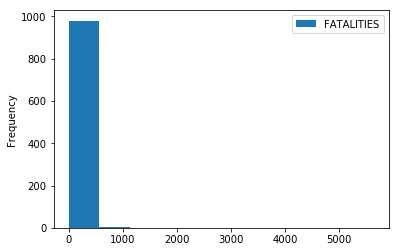

In [140]:
et_fat.plot.hist()

In [142]:
et_fat.reset_index(level=0, inplace=True)

In [143]:
et_fat.columns

Index(['EVTYPE', 'FATALITIES'], dtype='object')

In [146]:
print(et_fat)

                             EVTYPE  FATALITIES
0                           TORNADO      5633.0
1                    EXCESSIVE HEAT      1903.0
2                       FLASH FLOOD       978.0
3                              HEAT       937.0
4                         LIGHTNING       816.0
5                         TSTM WIND       504.0
6                             FLOOD       470.0
7                       RIP CURRENT       368.0
8                         HIGH WIND       248.0
9                         AVALANCHE       224.0
10                     WINTER STORM       206.0
11                     RIP CURRENTS       204.0
12                        HEAT WAVE       172.0
13                     EXTREME COLD       160.0
14                THUNDERSTORM WIND       133.0
15                       HEAVY SNOW       127.0
16          EXTREME COLD/WIND CHILL       125.0
17                      STRONG WIND       103.0
18                        HIGH SURF       101.0
19                         BLIZZARD     

In [164]:
et_fat_test = et_fat[et_fat.FATALITIES > 100]

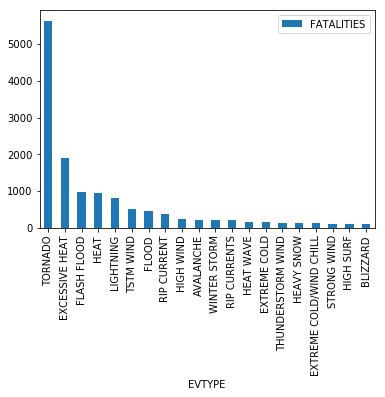

In [188]:
et_fat_test.plot.bar(x = "EVTYPE")

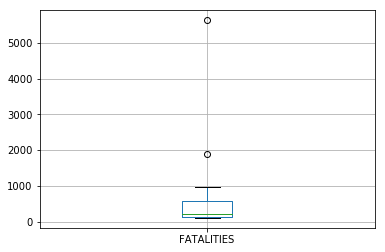

In [173]:
et_fat_test.boxplot(column = "FATALITIES")

In [157]:
state_Data = df[['EVTYPE','FATALITIES']][df.STATE=='NH'].groupby('EVTYPE').sum().sort_values('FATALITIES',ascending=False)


In [175]:
et_inj_test = et_inj[et_inj.INJURIES > 100]

In [176]:
print(et_inj_test)

                    INJURIES
EVTYPE                      
TORNADO              91346.0
TSTM WIND             6957.0
FLOOD                 6789.0
EXCESSIVE HEAT        6525.0
LIGHTNING             5230.0
HEAT                  2100.0
ICE STORM             1975.0
FLASH FLOOD           1777.0
THUNDERSTORM WIND     1488.0
HAIL                  1361.0
WINTER STORM          1321.0
HURRICANE/TYPHOON     1275.0
HIGH WIND             1137.0
HEAVY SNOW            1021.0
WILDFIRE               911.0
THUNDERSTORM WINDS     908.0
BLIZZARD               805.0
FOG                    734.0
WILD/FOREST FIRE       545.0
DUST STORM             440.0
WINTER WEATHER         398.0
DENSE FOG              342.0
TROPICAL STORM         340.0
HEAT WAVE              309.0
HIGH WINDS             302.0
RIP CURRENTS           297.0
STRONG WIND            280.0
HEAVY RAIN             251.0
RIP CURRENT            232.0
EXTREME COLD           231.0
GLAZE                  216.0
AVALANCHE              170.0
EXTREME HEAT  

In [178]:
et_inj.reset_index(level=0, inplace=True)

In [180]:
print(et_inj)

                             EVTYPE  INJURIES
0                           TORNADO   91346.0
1                         TSTM WIND    6957.0
2                             FLOOD    6789.0
3                    EXCESSIVE HEAT    6525.0
4                         LIGHTNING    5230.0
5                              HEAT    2100.0
6                         ICE STORM    1975.0
7                       FLASH FLOOD    1777.0
8                 THUNDERSTORM WIND    1488.0
9                              HAIL    1361.0
10                     WINTER STORM    1321.0
11                HURRICANE/TYPHOON    1275.0
12                        HIGH WIND    1137.0
13                       HEAVY SNOW    1021.0
14                         WILDFIRE     911.0
15               THUNDERSTORM WINDS     908.0
16                         BLIZZARD     805.0
17                              FOG     734.0
18                 WILD/FOREST FIRE     545.0
19                       DUST STORM     440.0
20                   WINTER WEATHE

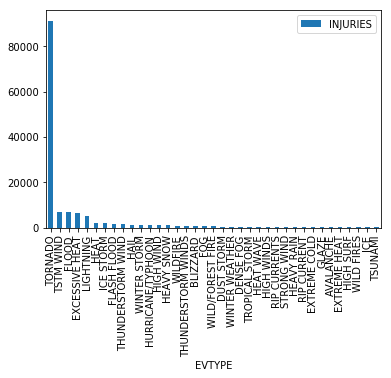

In [186]:
et_inj_test.plot.bar()

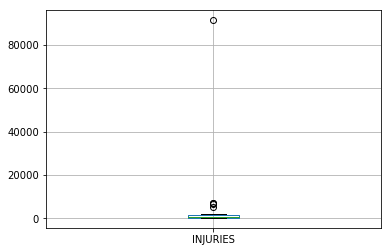

In [189]:
et_inj_test.boxplot(column = "INJURIES")

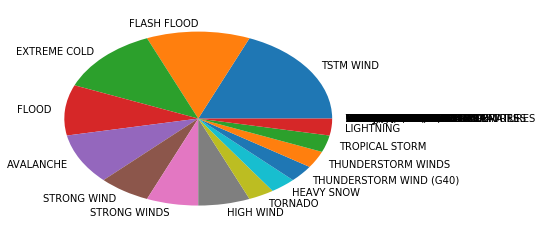

In [191]:
pie(state_Data, labels=state_Data.index);

In [192]:
dd = df[['FATALITIES','EVTYPE','STATE']].groupby(['EVTYPE','STATE']).sum().sort_values('FATALITIES',ascending=False)

In [193]:
dd

FATALITIES
EVTYPE                         STATE            
HEAT                           IL          653.0
TORNADO                        AL          617.0
                               TX          538.0
                               MS          450.0
                               MO          388.0
                               AR          379.0
                               TN          368.0
EXCESSIVE HEAT                 PA          359.0
                               IL          330.0
TORNADO                        OK          296.0
EXCESSIVE HEAT                 TX          269.0
TORNADO                        IN          252.0
                               MI          243.0
                               KS          236.0
                               IL          203.0
                               OH          191.0
EXCESSIVE HEAT                 MO          190.0
TORNADO                        GA          180.0
FLASH FLOOD                    TX          177.0
RIP CURRENT                    FL          172.0
TORNADO                        FL          161.0
                               LA          153.0
                               NC          126.0
                               KY          125.0
LIGHTNING                      FL          123.0
EXCESSIVE HEAT                 CA          110.0
TORNADO                        MA          108.0
HEAT WAVE                      PA          107.0
RIP CURRENTS                   FL           99.0
TORNADO                        MN           99.0
                               WI           96.0
EXCESSIVE HEAT                 NY           93.0
                               MD           88.0
TORNADO                        PA           82.0
                               IA           81.0
FLASH FLOOD                    MO           72.0
EXTREME HEAT                   WI           67.0
EXTREME COLD/WIND CHILL        IL           64.0
EXCESSIVE HEAT                 OK           63.0
FLASH FLOOD                    AZ           62.0
TORNADO                        SC           59.0
LIGHTNING                      TX           57.0
EXCESSIVE HEAT                 AZ           55.0
                               LA           55.0
TORNADO                        NE           54.0
HEAT                           NV           54.0
COLD/WIND CHILL                IL           51.0
FLASH FLOOD                    PA           50.0
                               AR           49.0
FLOOD                          TX           49.0
LIGHTNING                      CO           48.0
AVALANCHE                      CO           48.0
                               UT           44.0
TSTM WIND                      TX           42.0
                               MI           40.0
FLASH FLOOD                    KY           40.0
EXCESSIVE HEAT                 NJ           39.0
HEAT                           MO           39.0
FLASH FLOOD                    NY           38.0
                               NC           38.0
TORNADO                        VA           36.0
FLASH FLOOD                    CA           36.0
AVALANCHE                      WA           35.0
FLOOD                          TN           35.0
HURRICANE/TYPHOON              FL           35.0
HIGH SURF                      CA           35.0
HIGH WIND                      WA           34.0
FLOOD                          PA           34.0
FLASH FLOOD                    PR           34.0
                               OH           34.0
RIP CURRENTS                   CA           33.0
AVALANCHE                      AK           33.0
WILDFIRE                       CA           32.0
LIGHTNING                      OH           32.0
FLASH FLOOD                    OK           32.0
TSUNAMI                        AS           32.0
TSTM WIND                      AL           31.0
                               OH           31.0
LIGHTNING                      GA           30.0
FLASH FLOOD                    VA           29.0
UNSEASONABLY WARM AN